### Importación librerias requeridas
### Obtener conexión y generar consulta ppal

In [316]:
import os
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import tkinter as tk
from tkcalendar import Calendar

load_dotenv()

%run conexionDB.ipynb

# Obtener la conexión
engine = obtener_conexion()

#### Calcular fechas dinámicamente permitiendo al usuario seleccionarlas a través de un Calendario

#### Análisis de todos los Tickets recibidos por todas las áreas de la entidad.

In [317]:
# Variable global para almacenar el dataframe
df = None

# Función para obtener la fecha seleccionada
def obtener_fechas():
    global df  # Usar la variable global

    # Obtiene las fechas seleccionadas
    fecha_inicio = calendar_inicio.get_date()
    fecha_fin = calendar_fin.get_date()
    
    # Convertir las fechas a formato adecuado
    fecha_inicio = str(fecha_inicio)
    fecha_fin = str(fecha_fin)
    
    # Crear la consulta SQL con las fechas seleccionadas
    query = f"""
    SELECT os.number AS 'No', 
    	   dep.id,
           dep.name,       
    	   osd.priority,
           tp.priority as npriority,
    	   sla.grace_period,
           ht.topic,
           sla.name AS 'Sla',
           osd.subject as Titulo, 
           DATE_ADD(os.created, INTERVAL -6 HOUR) as Creado,
           DATE_ADD(os.closed, INTERVAL -6 HOUR) as Cerrado, 
           DATE_ADD(os.reopened, INTERVAL -6 HOUR) as Reabierto,
    	   us.name AS 'Usuario'
    FROM ost_ticket AS os
    LEFT JOIN ost_ticket__cdata AS osd ON os.ticket_id = osd.ticket_id
    LEFT JOIN ost_sla AS sla ON os.sla_id = sla.id
    LEFT JOIN ost_help_topic AS ht ON os.topic_id = ht.topic_id
    LEFT JOIN ost_ticket_priority AS tp ON osd.priority = tp.priority_id
    LEFT JOIN ost_department AS dep ON os.dept_id = dep.id
    LEFT JOIN ost_user AS us ON os.user_id = us.id
    WHERE DATE_ADD(os.created, INTERVAL -6 HOUR) BETWEEN '{fecha_inicio}' AND DATE_ADD('{fecha_fin}', INTERVAL 1 DAY)
    ORDER BY os.created
    """    
    
    # Imprimir la consulta para verificar
    print(query)
    
    # Ejecutar la consulta y almacenar los resultados en la variable global
    df = pd.read_sql(query, engine)
    
    # Cerrar la ventana
    ventana.destroy()
    #Aca finaliza la función obtener_fechas()

# Crear la ventana principal
ventana = tk.Tk()
ventana.title("Seleccionar Fechas")

# Etiquetas
tk.Label(ventana, text="Fecha Inicial").grid(row=0, column=0, padx=10, pady=10)
tk.Label(ventana, text="Fecha Final").grid(row=1, column=0, padx=10, pady=10)

# Crear calendario para la fecha de inicio
calendar_inicio = Calendar(ventana, date_pattern='yyyy-mm-dd', locale="es_ES",
                          background = "blue",
                          foreground = "white",
                          selectbackground = "red",
                          normalbackground = "lightblue",
                          weekendbackground = "darkblue",
                          weekendforeground = "white")                          
calendar_inicio.grid(row=0, column=1, padx=10, pady=10)

# Crear calendario para la fecha de fin
calendar_fin = Calendar(ventana, date_pattern='yyyy-mm-dd', locale="es_ES",
                          background = "blue",
                          foreground = "white",
                          selectbackground = "red",
                          normalbackground = "lightblue",
                          weekendbackground = "darkblue",
                          weekendforeground = "white")                          
calendar_fin.grid(row=1, column=1, padx=10, pady=10)

# Botón para obtener las fechas y ejecutar la consulta llamando la función previamente creada obtener_fechas()
boton = tk.Button(ventana, text="Obtener resultados", command=obtener_fechas)
boton.grid(row=2, column=0, columnspan=2, pady=20)

# Iniciar la interfaz
ventana.mainloop()

# Imprimir el dataframe global después de que la ventana se cierre
if df is not None:
    print(df)


    SELECT os.number AS 'No', 
    	   dep.id,
           dep.name,       
    	   osd.priority,
           tp.priority as npriority,
    	   sla.grace_period,
           ht.topic,
           sla.name AS 'Sla',
           osd.subject as Titulo, 
           DATE_ADD(os.created, INTERVAL -6 HOUR) as Creado,
           DATE_ADD(os.closed, INTERVAL -6 HOUR) as Cerrado, 
           DATE_ADD(os.reopened, INTERVAL -6 HOUR) as Reabierto,
    	   us.name AS 'Usuario'
    FROM ost_ticket AS os
    LEFT JOIN ost_ticket__cdata AS osd ON os.ticket_id = osd.ticket_id
    LEFT JOIN ost_sla AS sla ON os.sla_id = sla.id
    LEFT JOIN ost_help_topic AS ht ON os.topic_id = ht.topic_id
    LEFT JOIN ost_ticket_priority AS tp ON osd.priority = tp.priority_id
    LEFT JOIN ost_department AS dep ON os.dept_id = dep.id
    LEFT JOIN ost_user AS us ON os.user_id = us.id
    WHERE DATE_ADD(os.created, INTERVAL -6 HOUR) BETWEEN '2024-12-01' AND DATE_ADD('2024-12-31', INTERVAL 1 DAY)
    ORDER BY os.created
    

### Revisar la estructura del DataFrame

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   No            511 non-null    object        
 1   id            511 non-null    int64         
 2   name          511 non-null    object        
 3   priority      511 non-null    object        
 4   npriority     511 non-null    object        
 5   grace_period  443 non-null    float64       
 6   topic         511 non-null    object        
 7   Sla           443 non-null    object        
 8   Titulo        511 non-null    object        
 9   Creado        511 non-null    datetime64[ns]
 10  Cerrado       509 non-null    datetime64[ns]
 11  Reabierto     8 non-null      datetime64[ns]
 12  Usuario       511 non-null    object        
dtypes: datetime64[ns](3), float64(1), int64(1), object(8)
memory usage: 52.0+ KB


### Identificar valores nulos

In [319]:
#df.isnull().values.any()
df.isnull().sum()

No                0
id                0
name              0
priority          0
npriority         0
grace_period     68
topic             0
Sla              68
Titulo            0
Creado            0
Cerrado           2
Reabierto       503
Usuario           0
dtype: int64

### Revisar los tipos de datos
#### Que exista concordancia con el dato almacenado.

In [320]:
df.dtypes

No                      object
id                       int64
name                    object
priority                object
npriority               object
grace_period           float64
topic                   object
Sla                     object
Titulo                  object
Creado          datetime64[ns]
Cerrado         datetime64[ns]
Reabierto       datetime64[ns]
Usuario                 object
dtype: object

### Información estadística

In [321]:
df.describe()

,id,grace_period,Creado,Cerrado,Reabierto
count,511.000000,443.000000,511,509,8
mean,2.943249,35.040632,2024-12-15 05:47:58.902152704,2024-12-16 01:48:38.654224128,2024-12-25 11:08:52
min,1.000000,1.000000,2024-12-02 07:45:55,2024-12-02 08:47:29,2024-12-09 08:29:14
25%,2.500000,2.000000,2024-12-06 09:32:27,2024-12-09 10:57:15,2024-12-19 03:30:41.500000
50%,3.000000,2.000000,2024-12-13 11:03:55,2024-12-13 16:06:53,2024-12-27 11:16:22
75%,3.000000,2.000000,2024-12-23 10:47:00.500000,2024-12-23 15:19:28,2025-01-02 09:36:53
max,7.000000,720.000000,2024-12-31 11:51:25,2025-01-20 08:45:37,2025-01-03 16:28:56
std,1.311603,118.091721,NaN,NaN,NaN


In [322]:
# Obtener el tiempo transcurrido entre la fecha de creación y el cierre del ticket.
df["Diferencia_Cerrado"] = df["Cerrado"] - df["Creado"]
df

,No,id,name,priority,npriority,grace_period,topic,Sla,Titulo,Creado,Cerrado,Reabierto,Usuario,Diferencia_Cerrado
0,040349,3,TI - Registro,2,normal,2.0,SII,TI - Normal,Activar usuario digitador,2024-12-02 07:45:55,2024-12-02 08:47:29,NaT,OLGA PATRICIA ARAUJO NINO,0 days 01:01:34
1,040350,1,TI - Administrativo,2,normal,2.0,Otros,TI - Normal,ARCHIVO DRIVE,2024-12-02 08:37:45,2024-12-02 08:54:08,NaT,CARMEN BARRAGAN GUZMAN,0 days 00:16:23
2,040351,3,TI - Registro,2,normal,NaN,SII,None,modificacion de pago en el boletin,2024-12-02 08:42:19,2024-12-02 11:48:56,NaT,JORGE ALEJANDRO GUZMAN GARCIA,0 days 03:06:37
3,040352,1,TI - Administrativo,2,normal,2.0,Otros,TI - Normal,Vincular Impresora,2024-12-02 08:51:03,2024-12-02 09:22:26,NaT,JHON FREDY PÉREZ AMARILLO,0 days 00:31:23
4,040353,3,TI - Registro,2,normal,2.0,SII,TI - Normal,pasar codigo,2024-12-02 09:16:40,2024-12-02 09:41:42,NaT,ANGELA CONSUELO MOLANO,0 days 00:25:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,040855,1,TI - Administrativo,2,normal,2.0,Otros,TI - Normal,certihuella,2024-12-31 08:56:30,2024-12-31 09:10:08,NaT,JORGE ALEJANDRO GUZMAN GARCIA,0 days 00:13:38
507,040856,5,Comunicaciones,2,normal,120.0,Arte para difundir,Comunicaciones - 5 días,COLOMBIATEX 2025,2024-12-31 09:23:27,2025-01-09 10:30:11,2025-01-02 14:36:20,JORGE LUIS OVIEDO GUZMAN,9 days 01:06:44
508,040857,4,Gestión Documental,3,alta,2.0,Apoyo Trámites,Gestión Documental - 2 horas,REASIGNACIÓN DE TRAMITE,2024-12-31 09:55:20,2024-12-31 10:12:45,NaT,KAREN JICEL HERNANDEZ PRECIADO,0 days 00:17:25
509,040858,1,TI - Administrativo,3,alta,1.0,Fallo Impresora y Escáner,TI - Alta,IMPRESORA,2024-12-31 11:30:42,2024-12-31 12:25:05,NaT,INGRID TATIANA RIVERA HEREDIA,0 days 00:54:23


In [323]:
# Reemplazar los valores de la columna "id" donde el valor sea 3 por 1
df.loc[df["id"] == 3, "id"] = 1
df

,No,id,name,priority,npriority,grace_period,topic,Sla,Titulo,Creado,Cerrado,Reabierto,Usuario,Diferencia_Cerrado
0,040349,1,TI - Registro,2,normal,2.0,SII,TI - Normal,Activar usuario digitador,2024-12-02 07:45:55,2024-12-02 08:47:29,NaT,OLGA PATRICIA ARAUJO NINO,0 days 01:01:34
1,040350,1,TI - Administrativo,2,normal,2.0,Otros,TI - Normal,ARCHIVO DRIVE,2024-12-02 08:37:45,2024-12-02 08:54:08,NaT,CARMEN BARRAGAN GUZMAN,0 days 00:16:23
2,040351,1,TI - Registro,2,normal,NaN,SII,None,modificacion de pago en el boletin,2024-12-02 08:42:19,2024-12-02 11:48:56,NaT,JORGE ALEJANDRO GUZMAN GARCIA,0 days 03:06:37
3,040352,1,TI - Administrativo,2,normal,2.0,Otros,TI - Normal,Vincular Impresora,2024-12-02 08:51:03,2024-12-02 09:22:26,NaT,JHON FREDY PÉREZ AMARILLO,0 days 00:31:23
4,040353,1,TI - Registro,2,normal,2.0,SII,TI - Normal,pasar codigo,2024-12-02 09:16:40,2024-12-02 09:41:42,NaT,ANGELA CONSUELO MOLANO,0 days 00:25:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,040855,1,TI - Administrativo,2,normal,2.0,Otros,TI - Normal,certihuella,2024-12-31 08:56:30,2024-12-31 09:10:08,NaT,JORGE ALEJANDRO GUZMAN GARCIA,0 days 00:13:38
507,040856,5,Comunicaciones,2,normal,120.0,Arte para difundir,Comunicaciones - 5 días,COLOMBIATEX 2025,2024-12-31 09:23:27,2025-01-09 10:30:11,2025-01-02 14:36:20,JORGE LUIS OVIEDO GUZMAN,9 days 01:06:44
508,040857,4,Gestión Documental,3,alta,2.0,Apoyo Trámites,Gestión Documental - 2 horas,REASIGNACIÓN DE TRAMITE,2024-12-31 09:55:20,2024-12-31 10:12:45,NaT,KAREN JICEL HERNANDEZ PRECIADO,0 days 00:17:25
509,040858,1,TI - Administrativo,3,alta,1.0,Fallo Impresora y Escáner,TI - Alta,IMPRESORA,2024-12-31 11:30:42,2024-12-31 12:25:05,NaT,INGRID TATIANA RIVERA HEREDIA,0 days 00:54:23


In [324]:
# Definir las condiciones
condiciones = [
    (df["id"] == 1),         # id 1 -> Tecnología
    (df["id"] == 2),          # id 2 -> Infraestructura
    (df["id"] == 4),          # id 4 -> G.Documental
    (df["id"] == 5),          # id 5 -> Comunicaciones
    (df["id"] == 6),          # id 6 -> Jurídica
    (df["id"] == 7)           # id 7 -> E.Económicos
]

# Definir los valores correspondientes para cada condición
valores = [
    "Tecnología", 
    "Infraestructura", 
    "G.Documental", 
    "Comunicaciones", 
    "Jurídica", 
    "E.Económicos"
]

# Reemplazar en la columna name por los nuevos valores
df["name"] = np.select(condiciones, valores, default="Desconocido")
df

,No,id,name,priority,npriority,grace_period,topic,Sla,Titulo,Creado,Cerrado,Reabierto,Usuario,Diferencia_Cerrado
0,040349,1,Tecnología,2,normal,2.0,SII,TI - Normal,Activar usuario digitador,2024-12-02 07:45:55,2024-12-02 08:47:29,NaT,OLGA PATRICIA ARAUJO NINO,0 days 01:01:34
1,040350,1,Tecnología,2,normal,2.0,Otros,TI - Normal,ARCHIVO DRIVE,2024-12-02 08:37:45,2024-12-02 08:54:08,NaT,CARMEN BARRAGAN GUZMAN,0 days 00:16:23
2,040351,1,Tecnología,2,normal,NaN,SII,None,modificacion de pago en el boletin,2024-12-02 08:42:19,2024-12-02 11:48:56,NaT,JORGE ALEJANDRO GUZMAN GARCIA,0 days 03:06:37
3,040352,1,Tecnología,2,normal,2.0,Otros,TI - Normal,Vincular Impresora,2024-12-02 08:51:03,2024-12-02 09:22:26,NaT,JHON FREDY PÉREZ AMARILLO,0 days 00:31:23
4,040353,1,Tecnología,2,normal,2.0,SII,TI - Normal,pasar codigo,2024-12-02 09:16:40,2024-12-02 09:41:42,NaT,ANGELA CONSUELO MOLANO,0 days 00:25:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,040855,1,Tecnología,2,normal,2.0,Otros,TI - Normal,certihuella,2024-12-31 08:56:30,2024-12-31 09:10:08,NaT,JORGE ALEJANDRO GUZMAN GARCIA,0 days 00:13:38
507,040856,5,Comunicaciones,2,normal,120.0,Arte para difundir,Comunicaciones - 5 días,COLOMBIATEX 2025,2024-12-31 09:23:27,2025-01-09 10:30:11,2025-01-02 14:36:20,JORGE LUIS OVIEDO GUZMAN,9 days 01:06:44
508,040857,4,G.Documental,3,alta,2.0,Apoyo Trámites,Gestión Documental - 2 horas,REASIGNACIÓN DE TRAMITE,2024-12-31 09:55:20,2024-12-31 10:12:45,NaT,KAREN JICEL HERNANDEZ PRECIADO,0 days 00:17:25
509,040858,1,Tecnología,3,alta,1.0,Fallo Impresora y Escáner,TI - Alta,IMPRESORA,2024-12-31 11:30:42,2024-12-31 12:25:05,NaT,INGRID TATIANA RIVERA HEREDIA,0 days 00:54:23


In [325]:
df.duplicated().sum()

np.int64(0)

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   No                  511 non-null    object         
 1   id                  511 non-null    int64          
 2   name                511 non-null    object         
 3   priority            511 non-null    object         
 4   npriority           511 non-null    object         
 5   grace_period        443 non-null    float64        
 6   topic               511 non-null    object         
 7   Sla                 443 non-null    object         
 8   Titulo              511 non-null    object         
 9   Creado              511 non-null    datetime64[ns] 
 10  Cerrado             509 non-null    datetime64[ns] 
 11  Reabierto           8 non-null      datetime64[ns] 
 12  Usuario             511 non-null    object         
 13  Diferencia_Cerrado  509 non-null   

In [327]:
# Verificar valores únicos de priority
df["priority"].unique()

array(['2', '3', '1'], dtype=object)

In [328]:
# Eliminar posibles espacios en blanco de name
df["name"] = df["name"].str.strip()

In [329]:
# Eliminar posibles espacios en blanco de priority antes de convertirlo a int
df["priority"] = df["priority"].str.strip()

In [330]:
# Convertir priority (object) a priority(int) y así poderlo comparar (df["priority"] == 1)
df['priority'] = df['priority'].astype(int)

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   No                  511 non-null    object         
 1   id                  511 non-null    int64          
 2   name                511 non-null    object         
 3   priority            511 non-null    int64          
 4   npriority           511 non-null    object         
 5   grace_period        443 non-null    float64        
 6   topic               511 non-null    object         
 7   Sla                 443 non-null    object         
 8   Titulo              511 non-null    object         
 9   Creado              511 non-null    datetime64[ns] 
 10  Cerrado             509 non-null    datetime64[ns] 
 11  Reabierto           8 non-null      datetime64[ns] 
 12  Usuario             511 non-null    object         
 13  Diferencia_Cerrado  509 non-null   

In [332]:
# Convertir Diferencia_Cerrado a horas
df["Horas_Cerrado"] = df["Diferencia_Cerrado"].dt.total_seconds() / 3600


# Según las prioridades y el tiempo de los SLA, se calcula el indicador si Cumple o no
condiciones = [
    # Indicador de cumplimiento para el área de Tecnología
    (df["priority"] == 1) & (df["id"] == 1) & (df["Horas_Cerrado"] <= 3),        
    (df["priority"] == 2) & (df["id"] == 1) & (df["Horas_Cerrado"] <= 2),    
    (df["priority"] == 3) & (df["id"] == 1) & (df["Horas_Cerrado"] <= 1),

    # Indicador de cumplimiento para el área de Infraestructura
    (df["priority"] == 1) & (df["id"] == 2) & (df["Horas_Cerrado"] <= 3),   
    
    # Indicador de cumplimiento para el área de Gestión Documental
    (df["priority"] == 1) & (df["id"] == 4) & (df["Horas_Cerrado"] <= 24), 
    (df["priority"] == 2) & (df["id"] == 4) & (df["Horas_Cerrado"] <= 4),  
    (df["priority"] == 3) & (df["id"] == 4) & (df["Horas_Cerrado"] <= 2)       
]

valores = ["Cumple"] * len(condiciones)

# Asignar el valor por defecto en los casos que no cumplan con las condiciones
df["Indicador"] = np.select(condiciones, valores, default="No cumple")
df

,No,id,name,priority,npriority,grace_period,topic,Sla,Titulo,Creado,Cerrado,Reabierto,Usuario,Diferencia_Cerrado,Horas_Cerrado,Indicador
0,040349,1,Tecnología,2,normal,2.0,SII,TI - Normal,Activar usuario digitador,2024-12-02 07:45:55,2024-12-02 08:47:29,NaT,OLGA PATRICIA ARAUJO NINO,0 days 01:01:34,1.026111,Cumple
1,040350,1,Tecnología,2,normal,2.0,Otros,TI - Normal,ARCHIVO DRIVE,2024-12-02 08:37:45,2024-12-02 08:54:08,NaT,CARMEN BARRAGAN GUZMAN,0 days 00:16:23,0.273056,Cumple
2,040351,1,Tecnología,2,normal,NaN,SII,None,modificacion de pago en el boletin,2024-12-02 08:42:19,2024-12-02 11:48:56,NaT,JORGE ALEJANDRO GUZMAN GARCIA,0 days 03:06:37,3.110278,No cumple
3,040352,1,Tecnología,2,normal,2.0,Otros,TI - Normal,Vincular Impresora,2024-12-02 08:51:03,2024-12-02 09:22:26,NaT,JHON FREDY PÉREZ AMARILLO,0 days 00:31:23,0.523056,Cumple
4,040353,1,Tecnología,2,normal,2.0,SII,TI - Normal,pasar codigo,2024-12-02 09:16:40,2024-12-02 09:41:42,NaT,ANGELA CONSUELO MOLANO,0 days 00:25:02,0.417222,Cumple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,040855,1,Tecnología,2,normal,2.0,Otros,TI - Normal,certihuella,2024-12-31 08:56:30,2024-12-31 09:10:08,NaT,JORGE ALEJANDRO GUZMAN GARCIA,0 days 00:13:38,0.227222,Cumple
507,040856,5,Comunicaciones,2,normal,120.0,Arte para difundir,Comunicaciones - 5 días,COLOMBIATEX 2025,2024-12-31 09:23:27,2025-01-09 10:30:11,2025-01-02 14:36:20,JORGE LUIS OVIEDO GUZMAN,9 days 01:06:44,217.112222,No cumple
508,040857,4,G.Documental,3,alta,2.0,Apoyo Trámites,Gestión Documental - 2 horas,REASIGNACIÓN DE TRAMITE,2024-12-31 09:55:20,2024-12-31 10:12:45,NaT,KAREN JICEL HERNANDEZ PRECIADO,0 days 00:17:25,0.290278,Cumple
509,040858,1,Tecnología,3,alta,1.0,Fallo Impresora y Escáner,TI - Alta,IMPRESORA,2024-12-31 11:30:42,2024-12-31 12:25:05,NaT,INGRID TATIANA RIVERA HEREDIA,0 days 00:54:23,0.906389,Cumple


In [333]:
# Totalizar los tickets que cumplen
(df["Indicador"] == "Cumple").sum()

np.int64(384)

In [334]:
# Totalizar los tickets que NO cumplen
(df["Indicador"] == "No cumple").sum()

np.int64(127)

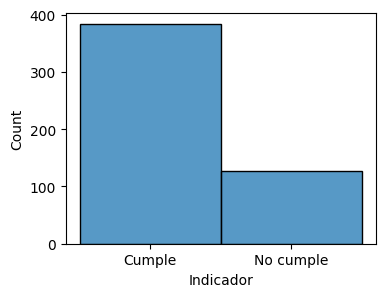

In [335]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (4,3))
sns.histplot(data = df, x = "Indicador", bins = 50)
plt.show()

In [336]:
df.to_csv("tickets.csv", index = False)

In [337]:
%pwd

'C:\\Users\\LiderTI\\Streaming de Google Drive\\Mi unidad\\Unicorn\\Proyecto Integrador Final\\Proyecto\\src'